In [1]:
#import packages
import pandas as pd
import requests
import os as os
import json 
import matplotlib.pyplot as plt
import tweepy
from timeit import default_timer as timer
import ast

# Gathring #

In [2]:
df_csv=pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
df_csv.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [4]:
imgpre_url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

In [5]:
imgpre_filename=imgpre_url.split("/")[-1]

In [6]:
response=requests.get(imgpre_url)

In [7]:
with open(imgpre_filename,mode="wb") as file:
    file.write(response.content)

In [8]:
df_img=pd.read_csv(imgpre_filename,sep="\t")

## Prapring the api creditial from json file ##

#you need to write your api in the attached json file"
credintials=pd.read_json("TweeterApiToken.json")
credintials.head()

consumer_key = credintials.tokens.APIkey
consumer_secret = credintials.tokens.APISecretkey
access_token = credintials.tokens.AccessToken
access_secret = credintials.tokens.AccessTokenSecret

auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)

api=tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [9]:
# you need to change 0 to 1 if you want to start reading the tweets 
if (0) :
    start = timer()
    failer={}
    Readinglog=""
    n=0
    with open ("tweet_json.txt",mode="w") as file:
        for tweetid in df_csv.tweet_id:
            n=n+1
            Readinglog+=(str(n)+" "+str(tweetid)+" ")
            print ( n," : ",timer() )
            try:
                temp=api.get_status(tweetid, tweet_mode='extended')._json
                Readinglog+="Success "
                json.dump(temp,file)            
                file.writelines("\n")
            except tweepy.TweepError as e:
                Readinglog+="Faild "
                failer[tweetid]=e
                pass
            #print(temp["favorite"])#favorite
            Readinglog+="\n"
            if n == 10000:
                break
    end = timer()
    print ( end - start)
    
    start = timer()
    failer={}
    Readinglog1=""
    n=0
    with open ("tweet_json1.txt",mode="w") as file:
        for tweetid in df_csv.tweet_id:
            n=n+1
            Readinglog1+=(str(n)+" "+str(tweetid)+" ")
            print ( n," : ",timer() )
            try:
                temp=api.get_status(tweetid, tweet_mode='extended')._json
                Readinglog1+="Success "
                json.dump(temp,file)            
                file.writelines("\n")
            except tweepy.TweepError as e:
                Readinglog1+="Faild "
                failer[tweetid]=e
                pass
            #print(temp["favorite"])#favorite
            Readinglog1+="\n"
            if n == 10:
                break

    end = timer()
    print ( end - start)

In [10]:
#https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object.html
with open ("tweet_json1.txt",mode="r") as file:
    lines=file.readlines()

In [11]:
json.loads(lines[3])

{'created_at': 'Sun Jul 30 15:58:51 +0000 2017',
 'id': 891689557279858688,
 'id_str': '891689557279858688',
 'full_text': 'This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ',
 'truncated': False,
 'display_text_range': [0, 79],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 891689552724799489,
    'id_str': '891689552724799489',
    'indices': [80, 103],
    'media_url': 'http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg',
    'url': 'https://t.co/tD36da7qLQ',
    'display_url': 'pic.twitter.com/tD36da7qLQ',
    'expanded_url': 'https://twitter.com/dog_rates/status/891689557279858688/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 510, 'h': 680, 'resize': 'fit'},
     'medium': {'w': 901, 'h': 1200, 'resize': 'fit'},
     'large': {'w': 1201,

In [12]:
with open ("tweet_json.txt",mode="r") as file:
    lines=file.readlines()

In [13]:
df_list=[]
for line in lines:
    line=json.loads(line)
    df_list.append({
        "tweet_id":line["id"],
        "favorite_count":line["favorite_count"],
        "retweet_count":line["retweet_count"],
           })

In [14]:
df_api=pd.DataFrame(df_list)

In [15]:
df_api.head()

,favorite_count,retweet_count,tweet_id
0,37731,8221,892420643555336193
1,32404,6077,892177421306343426
2,24401,4022,891815181378084864
3,41040,8376,891689557279858688
4,39238,9079,891327558926688256


In [16]:
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
df_csv.head(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


 # Assest  # 
## Quality: ## 
 
 ### df_csv ###
 1 - time stamp need to be changed to datatime instead of string<br/>
 2 - dummy varialbs ( dog type ) need to be cleaned into int ( boolean)<br/>
 3 - in_reply_to_status_id should be changed to string type <br/>
 4 - retweeted_status_user_id  should be changed to string type <br/>
 5 - rating_numerator ,rating_denominator  changing into one float variable<br/>
 <br/>
 ### df_img: ###
 changing id's into string <br/>
 <br/>
 #### df_api ####
 <br/>
 changing id's into string
 
 

In [18]:
df_csv.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [19]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [20]:
df_csv.doggo.unique()

array(['None', 'doggo'], dtype=object)

In [21]:
df_csv.floofer.unique()

array(['None', 'floofer'], dtype=object)

In [22]:
df_csv.puppo.unique()

array(['None', 'puppo'], dtype=object)

In [23]:
df_csv.pupper.unique()

array(['None', 'pupper'], dtype=object)

In [24]:
df_csv[df_csv.expanded_urls.isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 30 to 2298
Data columns (total 17 columns):
tweet_id                      59 non-null int64
in_reply_to_status_id         55 non-null float64
in_reply_to_user_id           55 non-null float64
timestamp                     59 non-null object
source                        59 non-null object
text                          59 non-null object
retweeted_status_id           1 non-null float64
retweeted_status_user_id      1 non-null float64
retweeted_status_timestamp    1 non-null object
expanded_urls                 0 non-null object
rating_numerator              59 non-null int64
rating_denominator            59 non-null int64
name                          59 non-null object
doggo                         59 non-null object
floofer                       59 non-null object
pupper                        59 non-null object
puppo                         59 non-null object
dtypes: float64(4), int64(3), object(10)
memory usage: 8.3+ KB


In [25]:
df_csv[df_csv.expanded_urls.isna()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [26]:
df_csv[df_csv.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000205340BF860>,
      dtype=object)

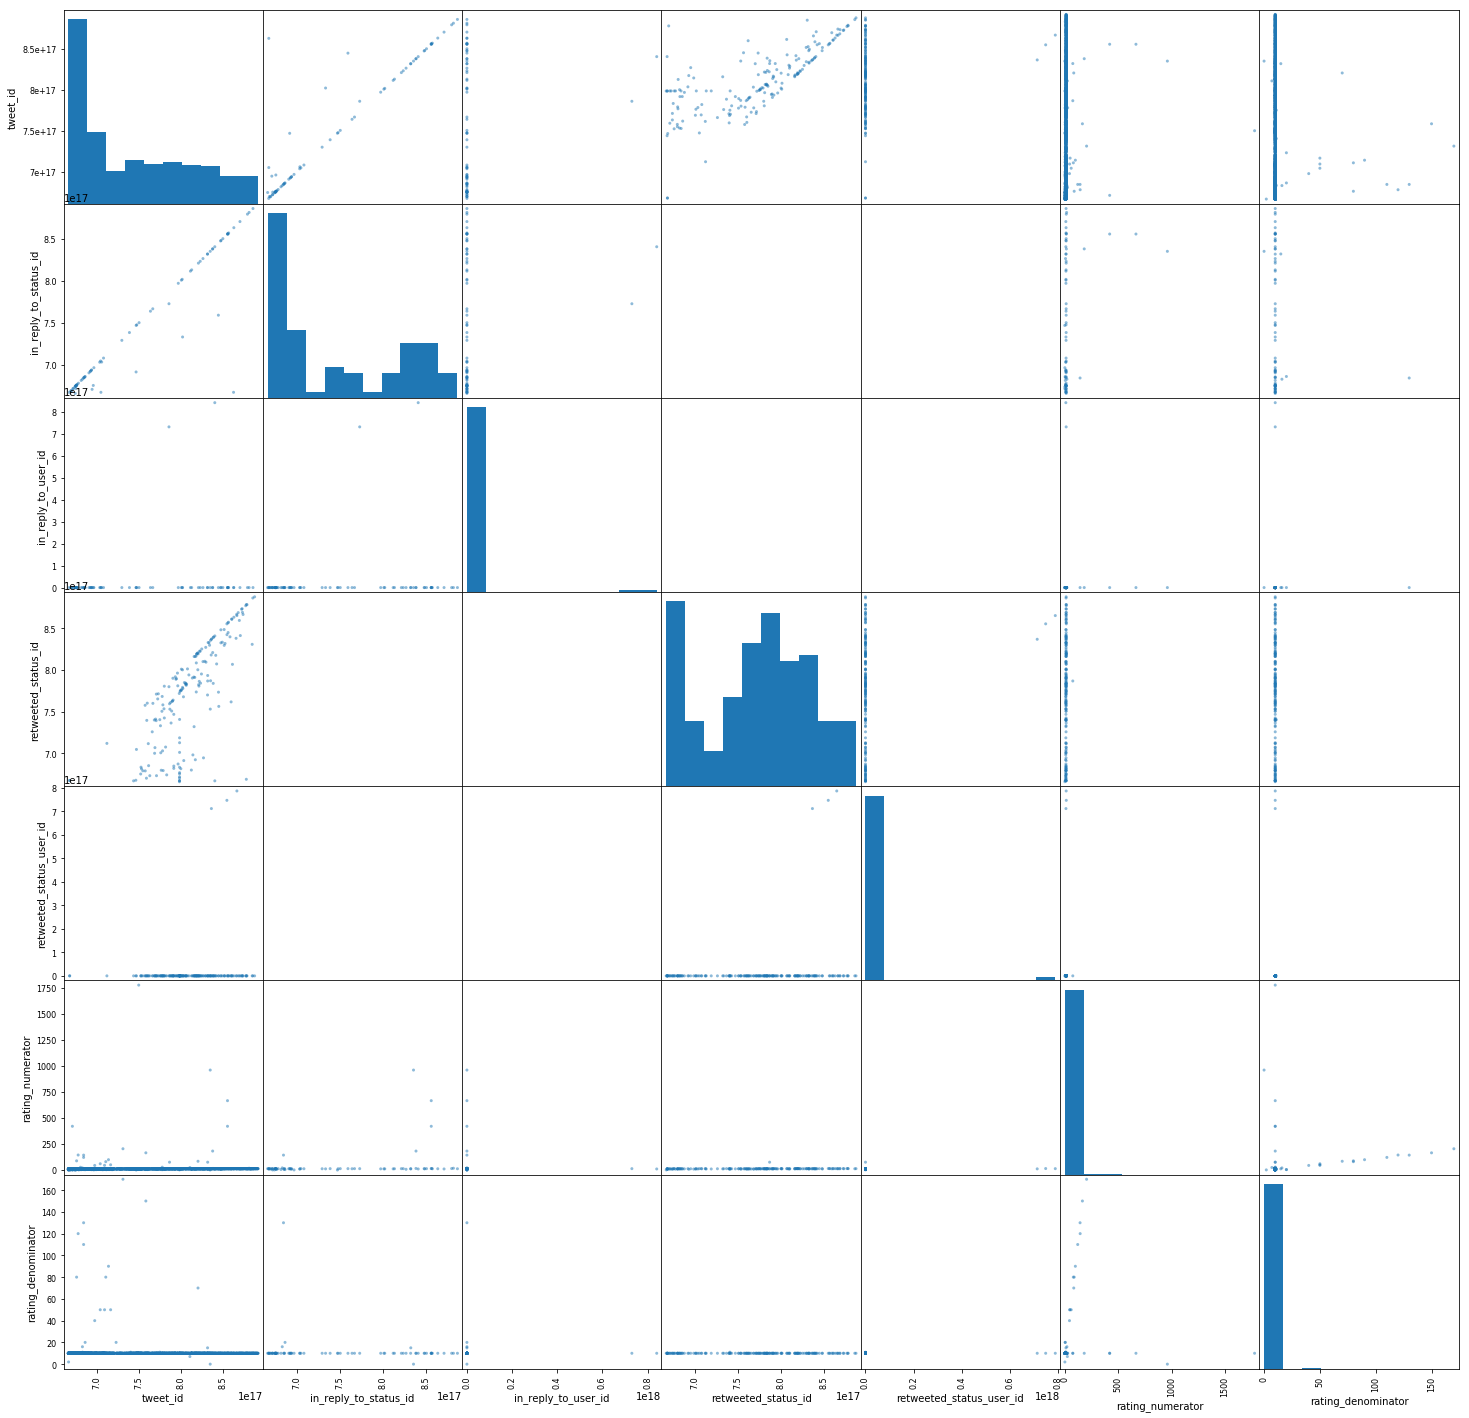

In [70]:
pd.scatter_matrix(df_csv,figsize=(25,25))

In [28]:
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [29]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
df_img.p3.unique()

array(['Shetland_sheepdog', 'Rhodesian_ridgeback', 'bloodhound',
       'miniature_pinscher', 'Doberman', 'Greater_Swiss_Mountain_dog',
       'terrapin', 'fur_coat', 'golden_retriever',
       'soft-coated_wheaten_terrier', 'Labrador_retriever', 'Pekinese',
       'Ibizan_hound', 'French_bulldog', 'malinois', 'Dandie_Dinmont',
       'borzoi', 'partridge', 'bookcase', 'basenji', 'miniature_poodle',
       'great_grey_owl', 'groenendael', 'Eskimo_dog', 'hamster', 'briard',
       'papillon', 'flat-coated_retriever', 'gar', 'Chihuahua',
       'Shih-Tzu', 'Pomeranian', 'dingo', 'power_drill', 'Saluki',
       'Great_Pyrenees', 'West_Highland_white_terrier', 'collie',
       'toy_poodle', 'vizsla', 'acorn', 'giant_schnauzer', 'teddy',
       'common_iguana', 'wig', 'water_buffalo', 'coyote', 'seat_belt',
       'kelpie', 'space_heater', 'Brabancon_griffon', 'standard_poodle',
       'beagle', 'Irish_water_spaniel', 'bluetick', 'Weimaraner',
       'Chesapeake_Bay_retriever', 'toilet_tiss

In [31]:
df_img.img_num.unique()

array([1, 4, 2, 3], dtype=int64)

In [32]:
df_img[df_img.img_num==4].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 144 to 2040
Data columns (total 12 columns):
tweet_id    31 non-null int64
jpg_url     31 non-null object
img_num     31 non-null int64
p1          31 non-null object
p1_conf     31 non-null float64
p1_dog      31 non-null bool
p2          31 non-null object
p2_conf     31 non-null float64
p2_dog      31 non-null bool
p3          31 non-null object
p3_conf     31 non-null float64
p3_dog      31 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 2.5+ KB


In [33]:
df_img[df_img.img_num==4].head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
144,668623201287675904,https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg,4,Chihuahua,0.708163,True,Pomeranian,0.091372,True,titi,0.067325,False
779,689905486972461056,https://pbs.twimg.com/media/CZMJYCRVAAE35Wk.jpg,4,Pomeranian,0.943331,True,Shetland_sheepdog,0.023675,True,chow,0.007165,True
1024,710588934686908417,https://pbs.twimg.com/media/CdyE2x1W8AAe0TG.jpg,4,Pembroke,0.982004,True,Cardigan,0.008943,True,malamute,0.007550,True
1161,734787690684657664,https://pbs.twimg.com/media/CjJ9gQ1WgAAXQtJ.jpg,4,golden_retriever,0.883991,True,chow,0.023542,True,Labrador_retriever,0.016056,True
1286,750868782890057730,https://pbs.twimg.com/media/CmufLLsXYAAsU0r.jpg,4,toy_poodle,0.912648,True,miniature_poodle,0.035059,True,seat_belt,0.026376,False


In [34]:
 df_api.head()

,favorite_count,retweet_count,tweet_id
0,37731,8221,892420643555336193
1,32404,6077,892177421306343426
2,24401,4022,891815181378084864
3,41040,8376,891689557279858688
4,39238,9079,891327558926688256


In [35]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
favorite_count    2339 non-null int64
retweet_count     2339 non-null int64
tweet_id          2339 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


  # Assest  # 

 ## tideness ##
 
1 -  df_api , df_csv  represent the same obeservations it would better to be merged together
 but we should be careful about the nullable and deference count between the raw<br/>
2 - merged , df_img represent the same obeservations it would better to be merged together
 but we should be careful about the nullable and deference count between the raw

# Cleaning #
## Quality ##

## df_csv ##
First We will copy our dataframe to a new data frame to ensure the consisty of our work

In [36]:
df_csv_clean=df_csv.copy()

### Define ###

chaging time into datatime type

### Code ###

In [37]:
df_csv_clean["timestamp"]=pd.to_datetime(df_csv_clean.timestamp)

### Test ###

In [38]:
df_csv_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### Define ###

chaging tweet_id into string type


### Code ###

In [39]:
df_csv_clean["tweet_id"]=df_csv_clean["tweet_id"].astype(str)
#df_csv_clean["retweeted_status_id"]=df_csv_clean["retweeted_status_id"].astype(str)
#df_csv_clean["retweeted_status_user_id"]=df_csv_clean["retweeted_status_user_id"].astype(str)
#df_csv_clean["in_reply_to_status_id"]=df_csv_clean["in_reply_to_status_id"].astype(str)
#df_csv_clean["in_reply_to_user_id"]=df_csv_clean["in_reply_to_user_id"].astype(str)


### Test ###

In [40]:
df_csv_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Define ### 

Drop retweeted_status_id, retweeted_status_user_id,in_reply_to_status_id,in_reply_to_user_id

### Code ###

In [41]:
df_csv_clean.drop(["retweeted_status_id",
                    "retweeted_status_user_id",
                    "in_reply_to_status_id",
                    "in_reply_to_user_id",
                   "retweeted_status_timestamp"],
                  axis=1,inplace=True)

### Test ###

In [42]:
df_csv_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 221.0+ KB


### Define ###
3- The current pipeline captures incorrect values when rating numerators contain decimals
and it will better to compine both numerator and deomerator in one column as it descripe one mesure


### Code ###

In [43]:
df_csv_clean[df_csv_clean.rating_numerator>10].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 0 to 2339
Data columns (total 12 columns):
tweet_id              1455 non-null object
timestamp             1455 non-null datetime64[ns]
source                1455 non-null object
text                  1455 non-null object
expanded_urls         1412 non-null object
rating_numerator      1455 non-null int64
rating_denominator    1455 non-null int64
name                  1455 non-null object
doggo                 1455 non-null object
floofer               1455 non-null object
pupper                1455 non-null object
puppo                 1455 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 147.8+ KB


In [44]:
ratting=df_csv_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
df_csv_clean.rating_numerator=ratting[0].astype(float)
df_csv_clean.rating_denominator=ratting[1].astype(float)
df_csv_clean=df_csv_clean[df_csv_clean["rating_denominator"]!=0]
df_csv_clean["rating"]=df_csv_clean.rating_numerator / df_csv_clean.rating_denominator
df_csv_clean.drop(["rating_denominator","rating_numerator"],axis=1,inplace=True)

### Test 

In [45]:
df_csv_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2355 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id         2355 non-null object
timestamp        2355 non-null datetime64[ns]
source           2355 non-null object
text             2355 non-null object
expanded_urls    2297 non-null object
name             2355 non-null object
doggo            2355 non-null object
floofer          2355 non-null object
pupper           2355 non-null object
puppo            2355 non-null object
rating           2355 non-null float64
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 220.8+ KB


In [46]:
df_csv_clean.describe()

,rating
count,2355.000000
mean,1.215748
std,4.079123
min,0.000000
25%,1.000000
50%,1.100000
75%,1.200000
max,177.600000


### df_img  ###
Copy df_img to a new dataframe


In [47]:
df_img_clean=df_img.copy()

### Define ### 
1- chaging id into string

### Code ###

In [48]:
df_img_clean["tweet_id"]=df_img_clean["tweet_id"].astype(str)

### Test ###

In [49]:
df_img_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [50]:
df_img_clean.describe()

,img_num,p1_conf,p2_conf,p3_conf
count,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,1.203855,0.594548,1.345886e-01,6.032417e-02
std,0.561875,0.271174,1.006657e-01,5.090593e-02
min,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,1.000000,0.843855,1.955655e-01,9.180755e-02
max,4.000000,1.000000,4.880140e-01,2.734190e-01


### df_api  ###
Copy df_api into other cleaning Dataframe

In [51]:
df_api_clean=df_api.copy()

### Define ###
1- chaging id into string

### Code ###

In [52]:
df_api_clean["tweet_id"]=df_api_clean["tweet_id"].astype(str)

### Test ###

In [53]:
df_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
favorite_count    2339 non-null int64
retweet_count     2339 non-null int64
tweet_id          2339 non-null object
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


In [54]:
df_api.describe()

,favorite_count,retweet_count,tweet_id
count,2339.000000,2339.000000,2.339000e+03
mean,7887.823001,2899.079949,7.421620e+17
std,12224.011478,4888.510848,6.828729e+16
min,0.000000,0.000000,6.660209e+17
25%,1366.500000,583.000000,6.783378e+17
50%,3431.000000,1353.000000,7.186133e+17
75%,9658.500000,3379.000000,7.986907e+17
max,162830.000000,82862.000000,8.924206e+17


# Cleaning #
## Tidiness ##

### df_csv_clean ###
### Define ###

Dog stages need to be combined into one column

In [55]:
df_csv_clean.loc[(df_csv_clean[['doggo', 'floofer', 'pupper', 'puppo']] != 'None'
                 ).sum(axis=1) > 1]

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating
191,855851453814013952,2017-04-22 18:31:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,None,doggo,None,None,puppo,1.3
200,854010172552949760,2017-04-17 16:34:26,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,None,doggo,floofer,None,None,1.1
460,817777686764523521,2017-01-07 16:59:28,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,Dido,doggo,None,pupper,None,1.3
531,808106460588765185,2016-12-12 00:29:28,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,None,doggo,None,pupper,None,1.2
565,802265048156610565,2016-11-25 21:37:47,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",https://twitter.com/dog_rates/status/802265048...,None,doggo,None,pupper,None,1.1
575,801115127852503040,2016-11-22 17:28:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,Bones,doggo,None,pupper,None,1.2
705,785639753186217984,2016-10-11 00:34:48,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,Pinot,doggo,None,pupper,None,1.0
733,781308096455073793,2016-09-29 01:42:20,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",https://vine.co/v/5rgu2Law2ut,None,doggo,None,pupper,None,1.2
778,775898661951791106,2016-09-14 03:27:11,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",https://twitter.com/dog_rates/status/733109485...,None,doggo,None,pupper,None,1.2
822,770093767776997377,2016-08-29 03:00:36,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,https://twitter.com/dog_rates/status/741067306...,just,doggo,None,pupper,None,1.2


### Code ###

In [56]:
df_csv_clean.doggo.replace("None","",inplace=True)
df_csv_clean.floofer.replace("None","",inplace=True)
df_csv_clean.pupper.replace("None","",inplace=True)
df_csv_clean.puppo.replace("None","",inplace=True)

In [57]:
df_csv_clean['stage'] = df_csv_clean.doggo + df_csv_clean.floofer + df_csv_clean.pupper + df_csv_clean.puppo
df_csv_clean.loc[df_csv_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
df_csv_clean.loc[df_csv_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
df_csv_clean.loc[df_csv_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'
df_csv_clean.stage.replace("","None",inplace=True)

### Test ###

In [58]:
df_csv_clean.stage.value_counts()

None             1975
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

### Define ###
Drop the dummy variabls

### Code ###

In [59]:
df_csv_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'],axis=1,inplace=True)

### Test ###

In [60]:
df_csv_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2355 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id         2355 non-null object
timestamp        2355 non-null datetime64[ns]
source           2355 non-null object
text             2355 non-null object
expanded_urls    2297 non-null object
name             2355 non-null object
rating           2355 non-null float64
stage            2355 non-null object
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 165.6+ KB


 ## df_api ,  df_csv ## 
 
 ## Define ##
 
represent the same obeservations it would better to be merged together but we should be careful about the nullable and deference count between the raw


### Code ###
We will Use merge for two Dataframe

In [61]:
merged_1=df_csv_clean.merge(df_api_clean,how="inner",on="tweet_id")

### Test ###

In [62]:
merged_1.head()

,tweet_id,timestamp,source,text,expanded_urls,name,rating,stage,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,None,37731,8221
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,None,32404,6077
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,None,24401,4022
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,None,41040,8376
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,None,39238,9079


In [63]:
merged_1.describe()

,rating,favorite_count,retweet_count
count,2338.000000,2338.000000,2338.000000
mean,1.215641,7890.263045,2900.286997
std,4.093911,12226.056769,4889.207987
min,0.000000,0.000000,0.000000
25%,1.000000,1365.250000,583.500000
50%,1.100000,3436.500000,1356.500000
75%,1.200000,9658.750000,3379.500000
max,177.600000,162830.000000,82862.000000


In [64]:
merged_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2338 entries, 0 to 2337
Data columns (total 10 columns):
tweet_id          2338 non-null object
timestamp         2338 non-null datetime64[ns]
source            2338 non-null object
text              2338 non-null object
expanded_urls     2280 non-null object
name              2338 non-null object
rating            2338 non-null float64
stage             2338 non-null object
favorite_count    2338 non-null int64
retweet_count     2338 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 200.9+ KB


## df_img ,  merged_1 ## 
## Define ##
df_img represent the same obeservations it would better to be merged together
 but we should be careful about the nullable and deference count between the raw

### Code ###

In [65]:
merged_2=merged_1.merge(df_img_clean,how="inner",on="tweet_id")

### Test ####

In [66]:
merged_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2066 entries, 0 to 2065
Data columns (total 21 columns):
tweet_id          2066 non-null object
timestamp         2066 non-null datetime64[ns]
source            2066 non-null object
text              2066 non-null object
expanded_urls     2066 non-null object
name              2066 non-null object
rating            2066 non-null float64
stage             2066 non-null object
favorite_count    2066 non-null int64
retweet_count     2066 non-null int64
jpg_url           2066 non-null object
img_num           2066 non-null int64
p1                2066 non-null object
p1_conf           2066 non-null float64
p1_dog            2066 non-null bool
p2                2066 non-null object
p2_conf           2066 non-null float64
p2_dog            2066 non-null bool
p3                2066 non-null object
p3_conf           2066 non-null float64
p3_dog            2066 non-null bool
dtypes: bool(3), datetime64[ns](1), float64(4), int64(3), object(10)
me

In [67]:
merged_2.describe()

,rating,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2.066000e+03,2.066000e+03
mean,1.165373,8332.854792,2772.818490,1.203291,0.594568,1.346716e-01,6.034151e-02
std,3.992903,12562.080796,4830.478374,0.562172,0.271062,1.007233e-01,5.094272e-02
min,0.000000,0.000000,11.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,1.000000,1584.500000,591.000000,1.000000,0.364254,5.387868e-02,1.621080e-02
50%,1.100000,3664.500000,1305.000000,1.000000,0.588030,1.184015e-01,4.939645e-02
75%,1.200000,10408.500000,3199.500000,1.000000,0.843883,1.955693e-01,9.208967e-02
max,177.600000,162830.000000,82862.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


In [68]:
merged_2.head()

,tweet_id,timestamp,source,text,expanded_urls,name,rating,stage,favorite_count,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,None,37731,8221,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,None,32404,6077,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,None,24401,4022,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,None,41040,8376,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,None,39238,9079,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


# Saving Data #
## saving as csv file ##



In [69]:
merged_2.to_csv("twitter_archive_master.csv",index_label="tweetid")

# Analysing and Visulisation #
please open the second notebook <b>act_reprot.ipynb</b>